In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('Label')
    plt.xlabel('Prediction')

In [3]:
vehicles=pd.read_csv("../datasets/vehicles.csv")

In [4]:
vehicles

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [5]:
y=vehicles["Class"]
x=vehicles.drop(["Class",],axis=1)

In [6]:
x.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
x.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
from sklearn import preprocessing

temp =x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(solver='adam', alpha=0.1,hidden_layer_sizes=(100),tol=10e-50, random_state=1,verbose=True,max_iter=10000,warm_start=True,batch_size=32)

In [13]:
clf.fit(x_train,y_train)

Iteration 1, loss = 1.43452488
Iteration 2, loss = 1.38082966
Iteration 3, loss = 1.33877129
Iteration 4, loss = 1.30004877
Iteration 5, loss = 1.26683422
Iteration 6, loss = 1.23939025
Iteration 7, loss = 1.21100409
Iteration 8, loss = 1.18828068
Iteration 9, loss = 1.16663680
Iteration 10, loss = 1.14678718
Iteration 11, loss = 1.12691910
Iteration 12, loss = 1.11015875
Iteration 13, loss = 1.08848674
Iteration 14, loss = 1.07117770
Iteration 15, loss = 1.05287454
Iteration 16, loss = 1.03635441
Iteration 17, loss = 1.02092281
Iteration 18, loss = 1.00693773
Iteration 19, loss = 0.98736157
Iteration 20, loss = 0.97837692
Iteration 21, loss = 0.96710232
Iteration 22, loss = 0.94511452
Iteration 23, loss = 0.93139206
Iteration 24, loss = 0.91689698
Iteration 25, loss = 0.90473174
Iteration 26, loss = 0.89437992
Iteration 27, loss = 0.88543041
Iteration 28, loss = 0.87170685
Iteration 29, loss = 0.86335130
Iteration 30, loss = 0.85542973
Iteration 31, loss = 0.84427868
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.1, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=1e-49, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [14]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))

Test Accuracy  0.7647058823529411
Train Accuracy  0.7766097240473062


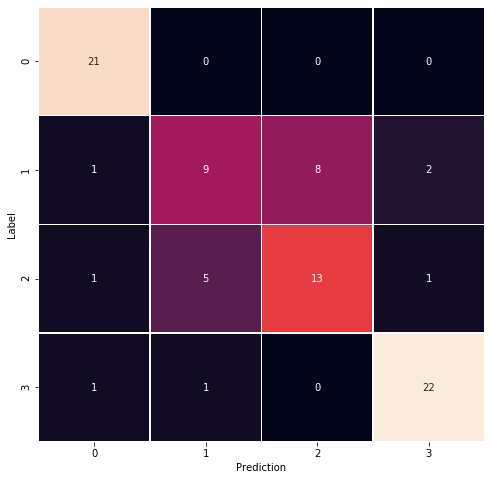

In [15]:
plot_confusion_matrix(y_test,clf.predict(x_test))


In [16]:
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [17]:
clf=SVC(kernel='rbf')

In [18]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test Accuracy  0.5411764705882353
Train Accuracy  0.6281208935611038


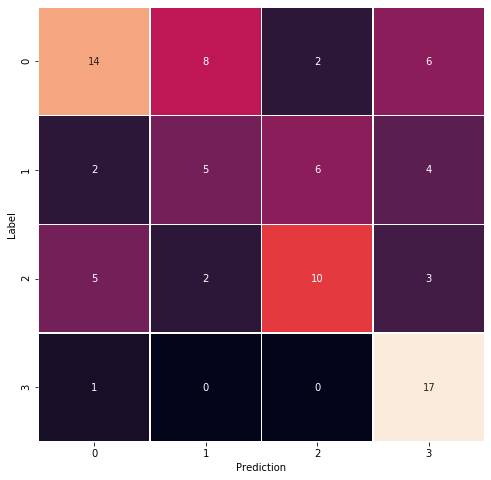

In [19]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [20]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha=0.01,loss="log",verbose=1,max_iter=100)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [22]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 2.82, NNZs: 18, Bias: 0.472567, T: 761, Avg. loss: 0.602506
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.86, NNZs: 18, Bias: 0.417487, T: 1522, Avg. loss: 0.477599
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 18, Bias: 0.414001, T: 2283, Avg. loss: 0.473598
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.86, NNZs: 18, Bias: 0.407726, T: 3044, Avg. loss: 0.469257
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.83, NNZs: 18, Bias: 0.458087, T: 3805, Avg. loss: 0.469636
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.84, NNZs: 18, Bias: 0.447736, T: 4566, Avg. loss: 0.470164
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.84, NNZs: 18, Bias: 0.454754, T: 5327, Avg. loss: 0.468781
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.85, NNZs: 18, Bias: 0.429057, T: 6088, Avg. loss: 0.467932
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 2.84, NNZs: 18, Bias: 0.447947, T: 6849, Avg. loss: 0.467817
Total training time

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

Test Accuracy  0.7058823529411765
Train Accuracy  0.6202365308804205


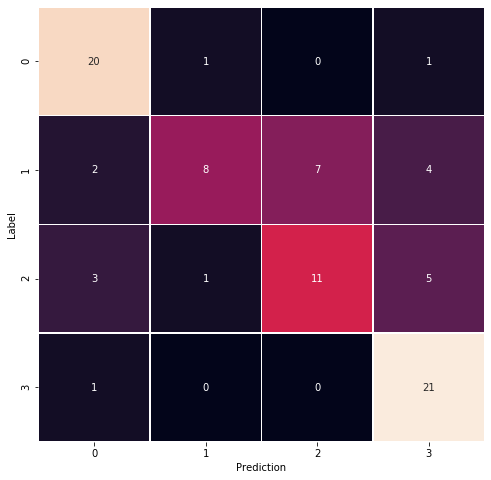

In [23]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [24]:
from sklearn.neighbors import NearestCentroid

In [25]:
clf=NearestCentroid()

In [26]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

Test Accuracy  0.5294117647058824
Train Accuracy  0.4559789750328515


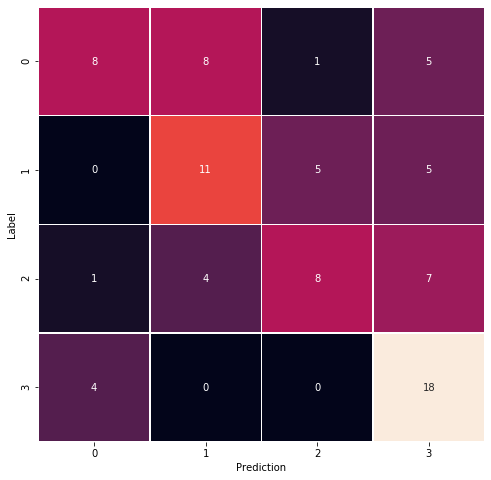

In [27]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()          

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test Accuracy  0.6823529411764706
Train Accuracy  1.0


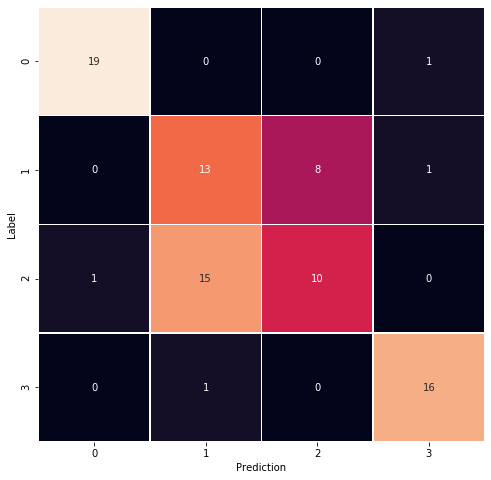

In [31]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [32]:
from xgboost import XGBClassifier 

/home/daniyal/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
clf=XGBClassifier()

In [34]:
clf.fit(x_train, y_train,eval_metric='logloss',verbose=True)

evals_result = clf.score(x_test,y_test)

/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy  0.7764705882352941
Train Accuracy  1.0


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


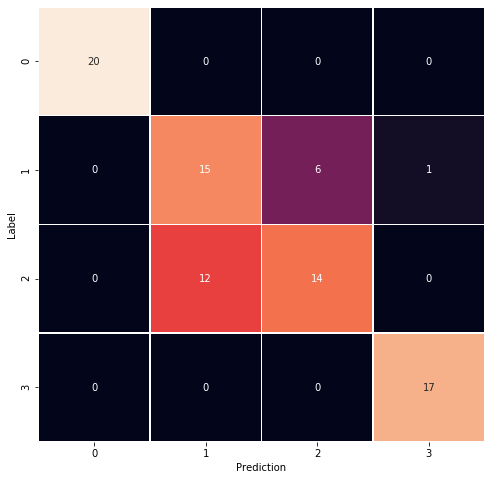

In [35]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
